# PCA
**Principal component analysis**  
https://towardsdatascience.com/the-mathematics-behind-principal-component-analysis-fff2d7f4b643  
https://www.sartorius.com/en/knowledge/science-snippets/what-is-principal-component-analysis-pca-and-how-it-is-used-507186  
https://builtin.com/data-science/step-step-explanation-principal-component-analysis  
https://towardsdatascience.com/principal-component-analysis-for-dimensionality-reduction-115a3d157bad

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler


## Data

In [ ]:
cancer= load_breast_cancer()

In [5]:
pd.set_option('display.max_columns', None)
pd.DataFrame(cancer.data, columns=cancer.feature_names)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


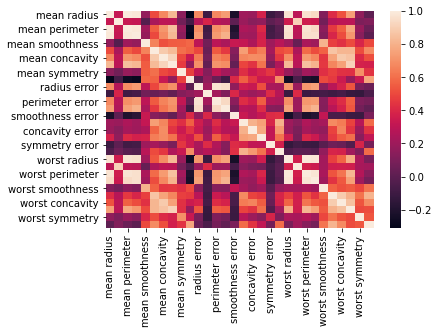

In [8]:
sns.heatmap(pd.DataFrame(cancer.data, columns=cancer.feature_names).corr())

## Scaling

In [10]:
scaler= StandardScaler()
x_scaled= scaler.fit_transform(cancer.data)

In [12]:
x_scaled.shape

(569, 30)

## Making Principal Components

In [13]:
from sklearn.decomposition import PCA

In [14]:
pca= PCA(n_components=30) #number of components to keep
pca.fit(x_scaled)

#transform
x_pca= pca.transform(x_scaled)

berapa % informasi yang kita simpan setelah PCA?

In [20]:
#variance dari masing-masing komponen
variance=[]

for i in range (0,30):
    variance.append(np.var(x_pca[:,i]))

In [24]:
# informasi yang tersimpan dari suatu komponen 
# diwakili dengan nilai varians komponen tersebut dibandingkan dengan nilai total varians dari semua komponen

# %informasi dari komponen pertama
variance[0]/sum(variance)*100

44.272025607526345

In [26]:
print('informasi yang diekstrak 2 komponen pertama:', round(np.sum(variance[:2])/np.sum(variance)*100,2),'%')

informasi yang diekstrak 2 komponen pertama: 63.24 %


## Reducing Dimensions from 30 to 2

In [27]:
pca= PCA(n_components=2)
pca.fit(x_scaled)
x_pca= pca.transform(x_scaled)

In [29]:
x_pca.shape

(569, 2)

## Scatter plot PCA result

In [30]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

Text(0, 0.5, 'Second Component')

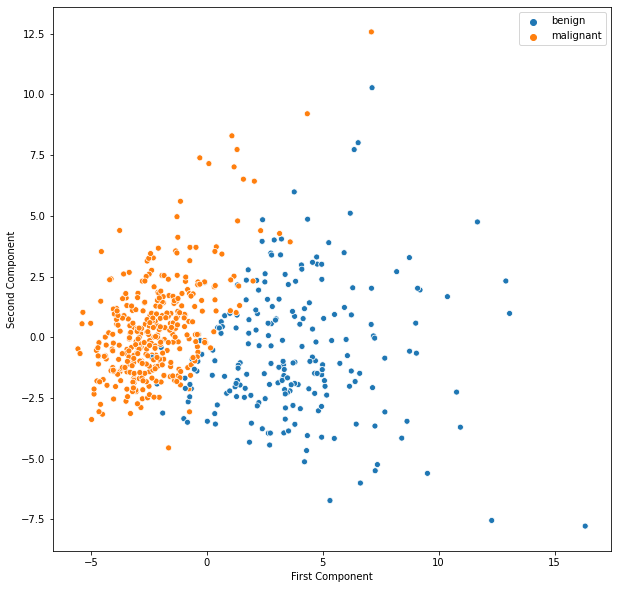

In [33]:
plt.figure(figsize=(10,10))
sns.scatterplot(x_pca[:,0], x_pca[:,1], hue=np.where(cancer.target,'malignant', 'benign'))
plt.xlabel('First Component')
plt.ylabel('Second Component')

* Setelah kita melakukan PCA dan mengambil 2 komponen, informasi yang diekstrak adalah 63.24%
* Dimensi dari data cancer direduksi dari 30 menjadi 2, dan informasi yang hilang sebesar 36.76% tapi, dapat dilihat bahwa kedua komponen bisa memisahkan benign dan malignant dengan baik
* Dengan PCA, kita bisa melihat struktur tersembunyi pada data
* sel kanker benign lebih tersebar dibanding yang malignant

In [37]:
pca.explained_variance_ratio_.sum()*100 #untuk mencari data yang terekstraksi

63.243207651559544

## Modeling

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline

In [41]:
x=pd.DataFrame(cancer.data, columns=cancer.feature_names)
y=cancer.target

In [46]:
x_train, x_test, y_train, y_test= train_test_split(x,y,
                                                  stratify=y,
                                                  random_state=2020,
                                                  test_size=0.2)

In [48]:
knn= KNeighborsClassifier()
estimator=Pipeline([
    ('preprocessing',StandardScaler()),
    ('model',knn)
])

In [50]:
estimator.fit(x_train,y_train)
y_predict=estimator.predict(x_test)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95        42
           1       0.96      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [57]:
## with pca
estimator=Pipeline([
    ('preprocess',StandardScaler()),
    ('PCA',PCA(n_components=2)),
    ('Model', KNeighborsClassifier())
])

In [60]:
estimator.fit(x_train,y_train)
y_predict=estimator.predict(x_test)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92        42
           1       0.95      0.96      0.95        72

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



Performa model KNN dengan dan tanpa PCA tidak berbeda jauh, tetapi eksekusi dengan PCA sedikit lebih cepat selesai.

# Clustering K-Means

In [61]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [62]:
## generate data
x,y= make_blobs(random_state=42)

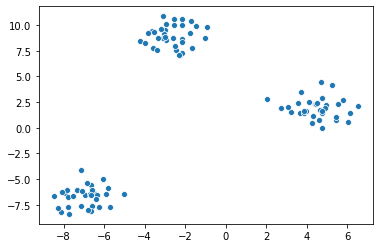

In [65]:
## Scatter plot
sns.scatterplot(x[:,0],x[:,1])

In [66]:
## Fit Kmeans
kmeans=KMeans(n_clusters=3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [67]:
kmeans.labels_

array([0, 1, 2, 1, 0, 1, 2, 1, 1, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0,
       0, 2, 2, 2, 1, 0, 0, 0, 0, 1, 1, 0, 2, 2, 2, 2, 1, 1, 0, 2, 1, 2,
       2, 1, 0, 0, 0, 1, 1, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 2, 1, 0, 1, 0, 1, 1, 2, 1, 2, 0, 2, 2, 2, 1,
       2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 0, 2])

In [69]:
kmeans.cluster_centers_

array([[-6.95170962, -6.67621669],
       [ 4.49951001,  1.93892013],
       [-2.66780392,  8.93576069]])

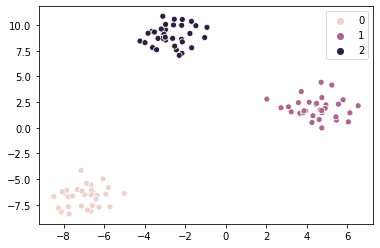

In [70]:
sns.scatterplot(x[:,0],x[:,1], hue=kmeans.labels_)

# Analysing with K-means

In [71]:
df=pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [73]:
df=df.rename(columns={'Annual Income (k$)':'Annual Income','Spending Score (1-100)':'Spending Score'})

In [75]:
x=df.loc[:,['Annual Income','Spending Score']]

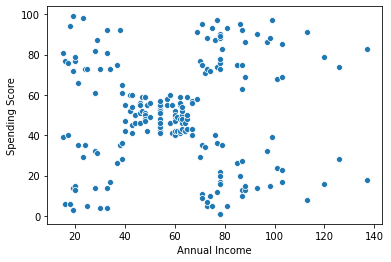

In [77]:
sns.scatterplot(x['Annual Income'],x['Spending Score'])

### Memutuskan jumlah cluster yang optimum

In [78]:
from scipy.spatial.distance import cdist,pdist
from sklearn.metrics import silhouette_score

#### Elbow Method

In [88]:
#clustering variation
k_num=range(1,11)
clusterings=[KMeans(n_clusters=k).fit(x) for k in k_num]
centroids= [k.cluster_centers_ for k in clusterings]

#within sumsquare
D_k= [cdist(x,cent, 'euclidean') for cent in centroids]
cIdx= [np.argmin(D, axis=1) for D in D_k]
dist= [np.min(D,axis=1) for D in D_k]
avgWithinSS=[sum(d)/x.shape[0] for d in dist]

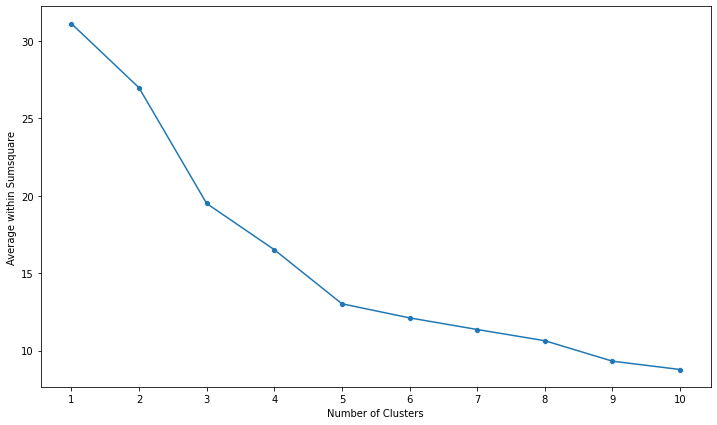

In [89]:
plt.figure(figsize=(12,7))
sns.lineplot(k_num,avgWithinSS)
sns.scatterplot(k_num,avgWithinSS)

plt.xticks(k_num)
plt.xlabel('Number of Clusters')
plt.ylabel('Average within Sumsquare')
plt.show()

In [90]:
# jumlah kluster optimum: 2 atau 5?

#### Shilouette Method

In [91]:
kmeans= KMeans(n_clusters=2)
kmeans.fit(x)

KMeans(n_clusters=2)

In [92]:
labels= kmeans.labels_
silhouette_score(x,labels, metric='euclidean')

0.2968969162503008

In [96]:
score=[]
k_num=range(2,11)
best=0

for i in k_num:
    kmeans= KMeans(n_clusters=i)
    kmeans.fit(x)
    labels=kmeans.labels_
    score.append(silhouette_score(x,labels,metric='euclidean'))
    if best<silhouette_score(x,labels,metric='euclidean'):
        best=silhouette_score(x,labels,metric='euclidean')
        best_k=i

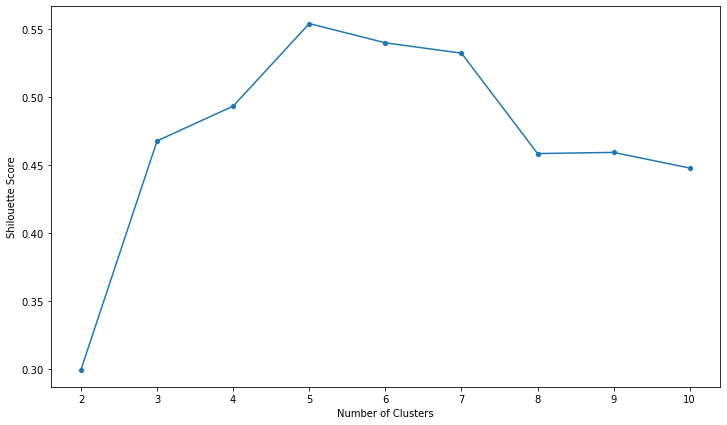

In [95]:
plt.figure(figsize=(12,7))
sns.lineplot(k_num,score)
sns.scatterplot(k_num,score)

plt.xticks(k_num)
plt.xlabel('Number of Clusters')
plt.ylabel('Shilouette Score')
plt.show()

In [98]:
print(best)
print(best_k)

0.553931997444648
5


### Final Result

In [99]:
kmeans=KMeans(n_clusters=best_k)
kmeans.fit(x)

KMeans(n_clusters=5)

In [103]:
x['cluster']=kmeans.labels_

In [104]:
x

,Annual Income,Spending Score,cluster
0,15,39,0
1,15,81,1
2,16,6,0
3,16,77,1
4,17,40,0
...,...,...,...
195,120,79,4
196,126,28,2
197,126,74,4
198,137,18,2


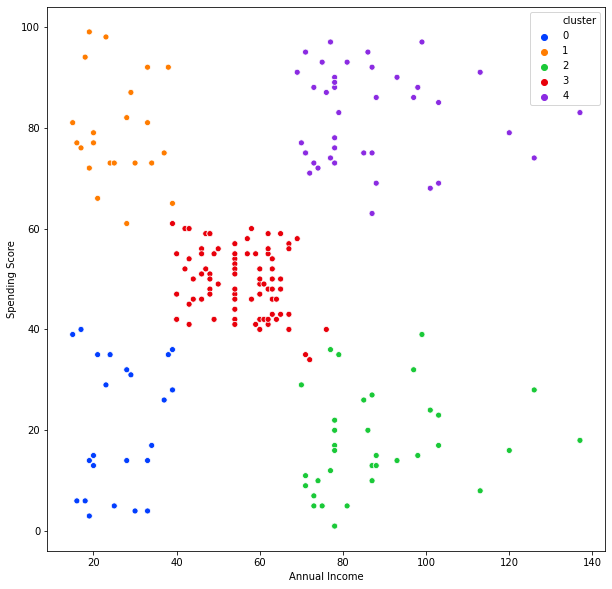

In [108]:
plt.figure(figsize=(10,10))
sns.scatterplot('Annual Income','Spending Score', hue='cluster', data=x,palette='bright')

In [110]:
x.groupby('cluster').mean()

,Annual Income,Spending Score
cluster,,
0,26.304348,20.913043
1,25.727273,79.363636
2,88.200000,17.114286
3,55.296296,49.518519
4,86.538462,82.128205


* cluster 0: annual income dan spending score rendah
* cluster 1: annual income rendah, tapi spending score tinggi
* cluster 2: annual income tinggi, tapi spending score rendah
* cluster 3: annual income dan spending score medium
* cluster 4: annual income tinggi, spending score tinggi

In [111]:
x.groupby('cluster').count()

,Annual Income,Spending Score
cluster,,
0,23,23
1,22,22
2,35,35
3,81,81
4,39,39


In [112]:
df= pd.read_csv("CC GENERAL.csv")
# https://www.kaggle.com/arjunbhasin2013/ccdata

In [113]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Latihan:  

Gunakan data CC General:
* Lakukan PCA, lalu coba putuskan berapa jumlah komponen yang bisa kita gunakan untuk analisis lebih lanjut berdasarkan % informasi yang diekstraksi
* bandingkan persen ekstraksi apabila kita menggunakan scaling dan tidak (standard scaler)

Gunakan data CC General:

* Lakukan EDA singkat
* Kira-kira 2 fitur mana yang cocok digunakan dalam clustering data CC general?
* Coba lakukan clustering dengan fitur yang kalian pilih dan cari jumlah cluster terbaik dengan elbow method dan shilouette score.
* Analisa hasil klustering kalian.

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [124]:
df.MINIMUM_PAYMENTS.value_counts().sort_index()

0.019163        1
0.037744        1
0.055880        1
0.059481        1
0.117036        1
               ..
43132.728230    1
50260.759470    1
56370.041170    1
61031.618600    1
76406.207520    1
Name: MINIMUM_PAYMENTS, Length: 8636, dtype: int64

In [128]:
df.MINIMUM_PAYMENTS=df.MINIMUM_PAYMENTS.fillna(0)

In [129]:
df=df.dropna()

In [130]:
x=df.drop(columns='CUST_ID')
scaler= StandardScaler()
x_scaled= scaler.fit_transform(df.drop(columns='CUST_ID'))

In [131]:
pca= PCA() 
pca.fit(x)

PCA()

In [135]:
pca.explained_variance_ratio_[0:2].sum()

0.6529779857835178

In [136]:
pca= PCA() 
pca.fit(x_scaled)

PCA()

In [141]:
pca.explained_variance_ratio_[0:4].sum()

0.639241926874688

## Clustering

In [143]:
df['TENURE'].value_counts()

12    7584
11     365
10     236
6      203
8      196
7      190
9      175
Name: TENURE, dtype: int64

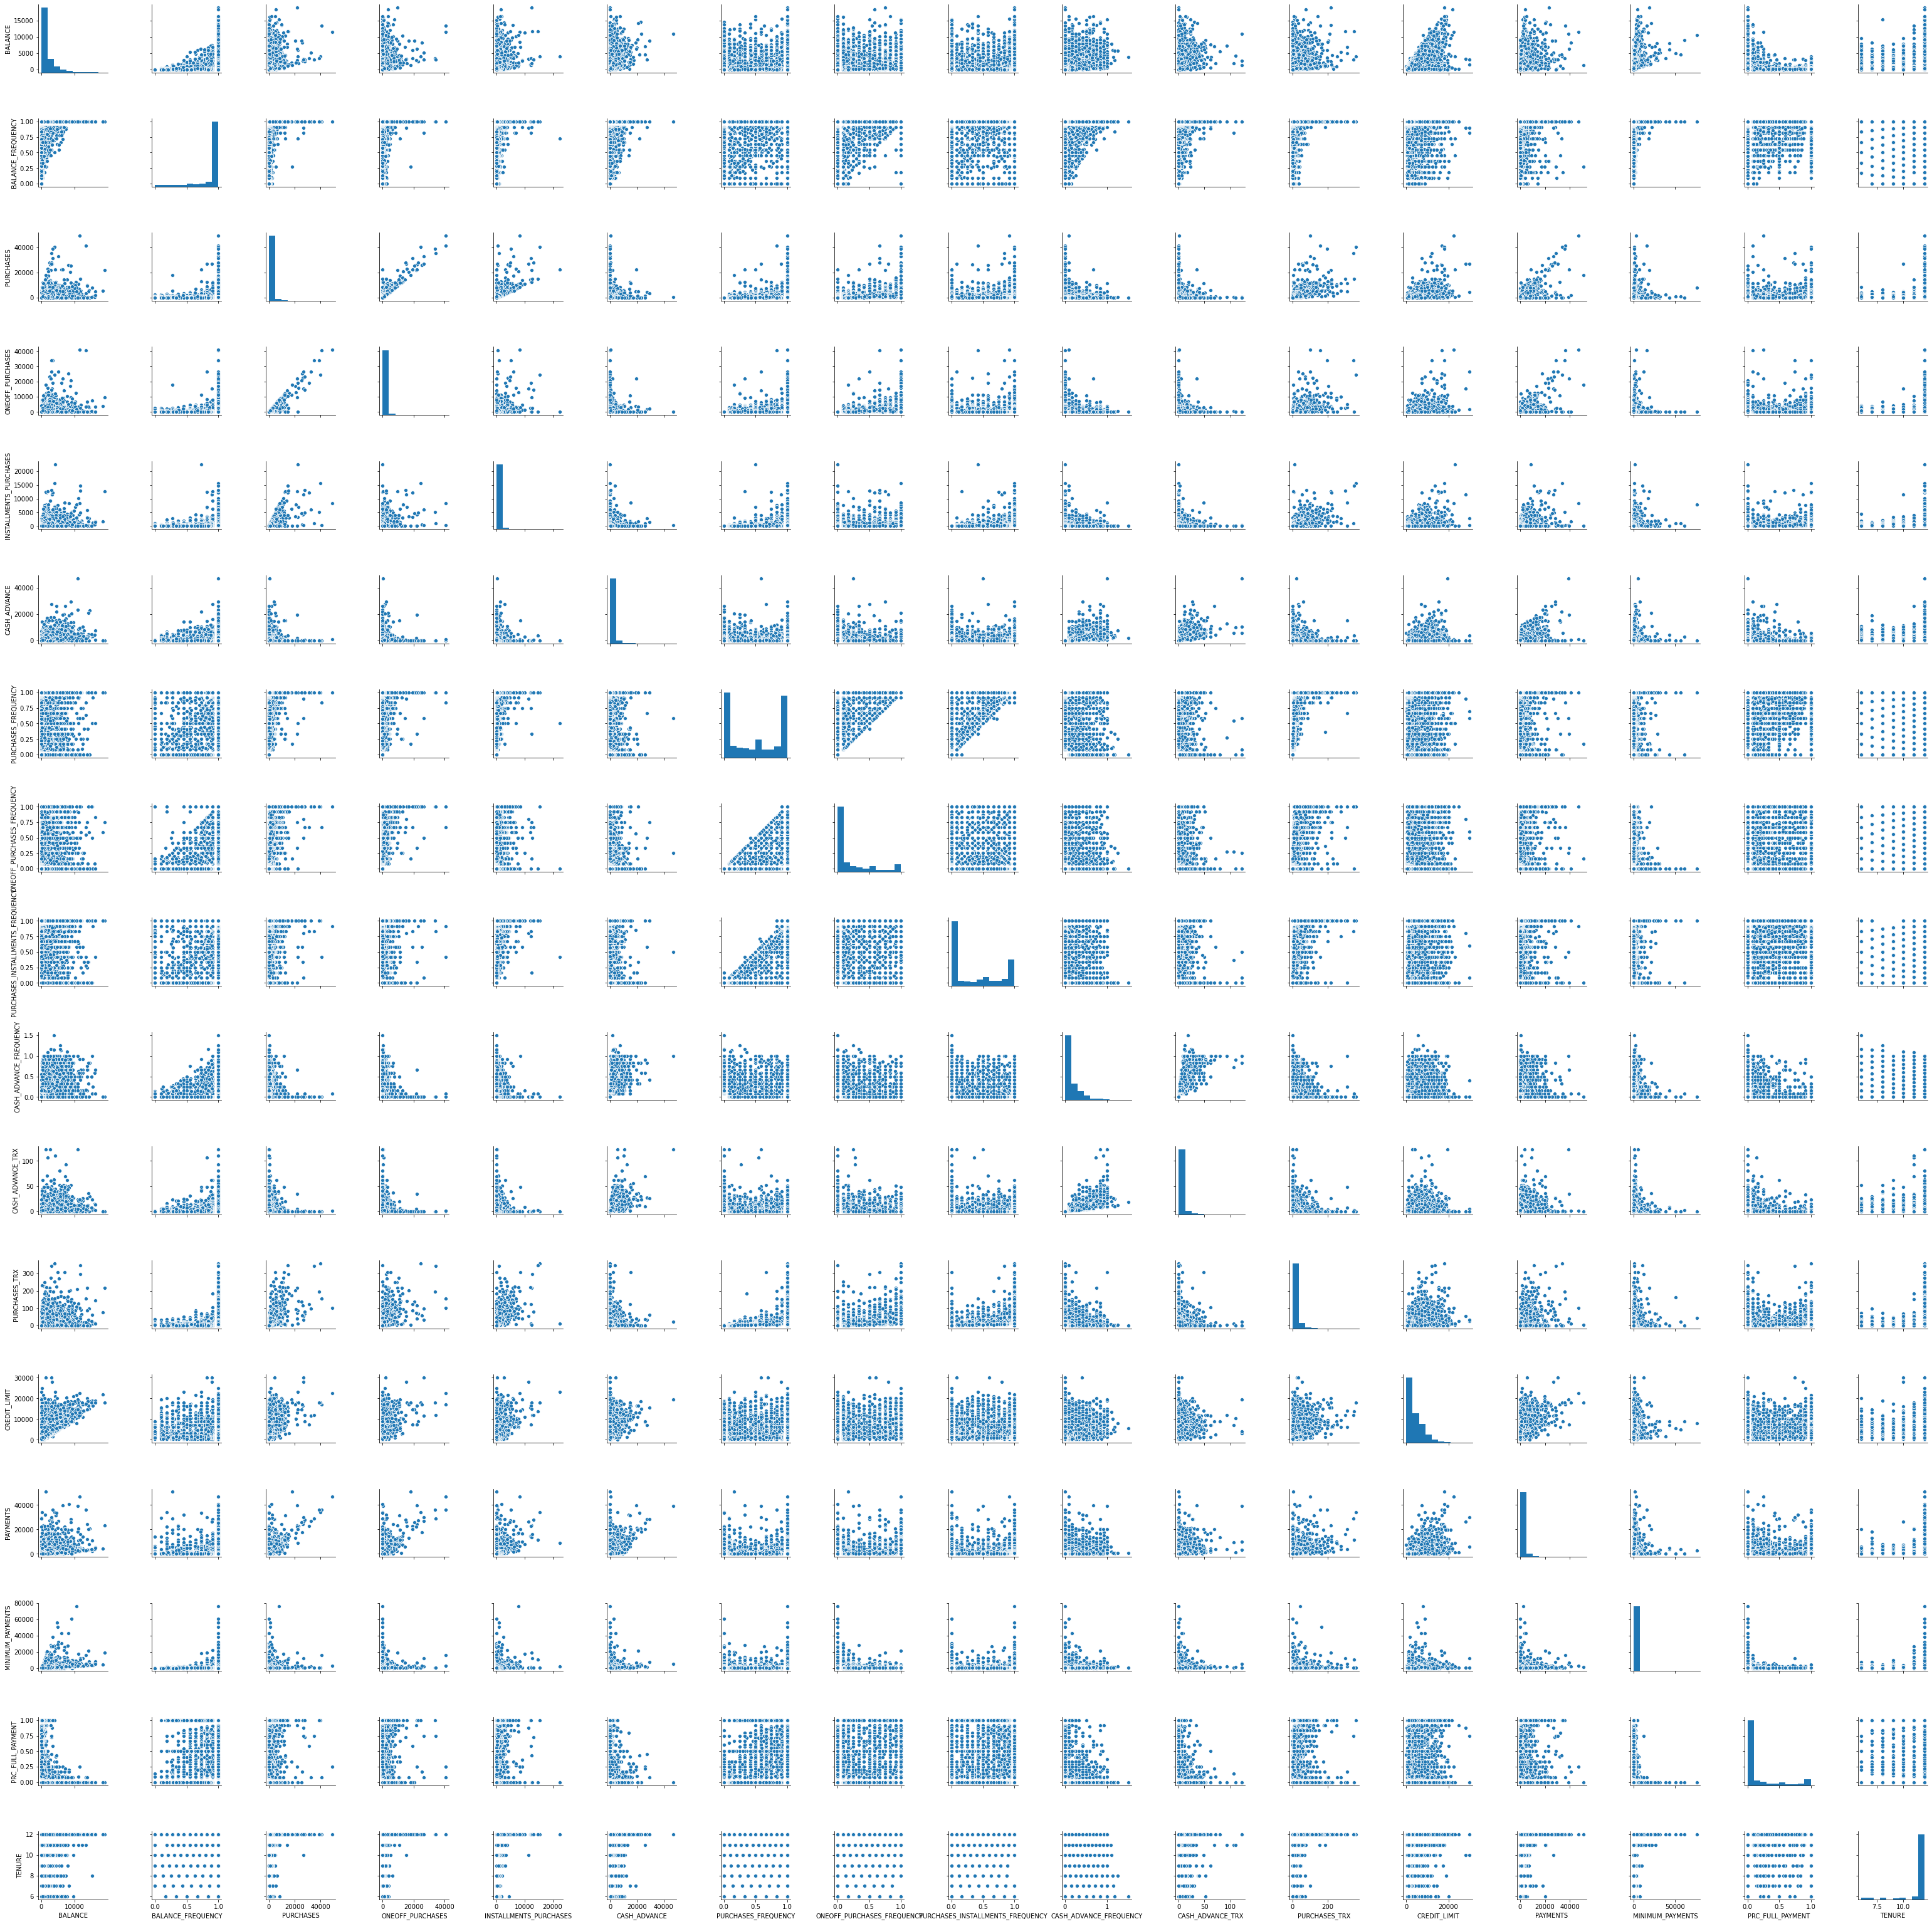

In [142]:
sns.pairplot(x)

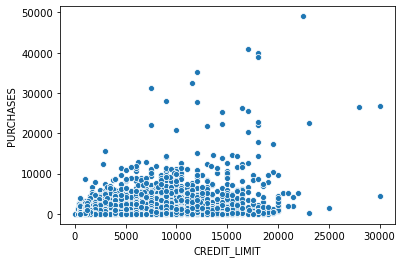

In [149]:
sns.scatterplot(x['CREDIT_LIMIT'], x['PURCHASES'])

In [181]:
score=[]
k_num=range(1,11)
best=0

for i in k_num:
    kmeans= KMeans(n_clusters=i)
    kmeans.fit(x[['CREDIT_LIMIT','PURCHASES']])
    labels=kmeans.labels_
    score.append(kmeans.inertia_)

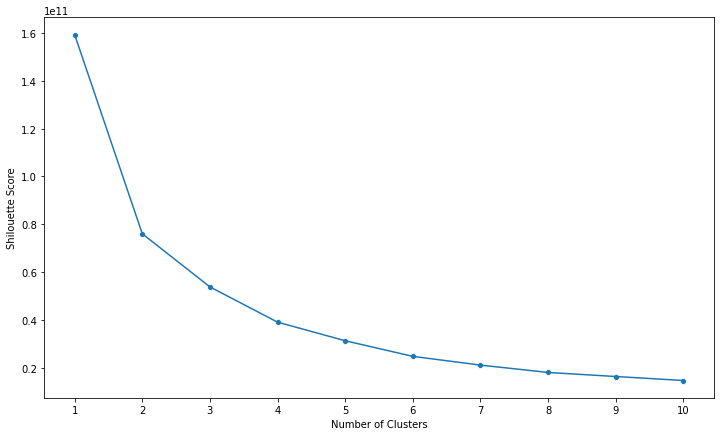

In [182]:
plt.figure(figsize=(12,7))
sns.lineplot(k_num,score)
sns.scatterplot(k_num,score)

plt.xticks(k_num)
plt.xlabel('Number of Clusters')
plt.ylabel('Shilouette Score')
plt.show()

In [183]:
score=[]
k_num=range(2,11)
best=0

for i in k_num:
    kmeans= KMeans(n_clusters=i)
    kmeans.fit(x[['CREDIT_LIMIT','PURCHASES']])
    labels=kmeans.labels_
    score.append(silhouette_score(x,labels,metric='euclidean'))
    if best<silhouette_score(x,labels,metric='euclidean'):
        best=silhouette_score(x,labels,metric='euclidean')
        best_k=i

In [184]:
print(best,best_k)

0.45051294280652515 2


In [189]:
kmeans=KMeans(n_clusters=best_k)
kmeans.fit(x[['CREDIT_LIMIT','PURCHASES']])

KMeans(n_clusters=2)

In [190]:
x['cluster']=kmeans.labels_

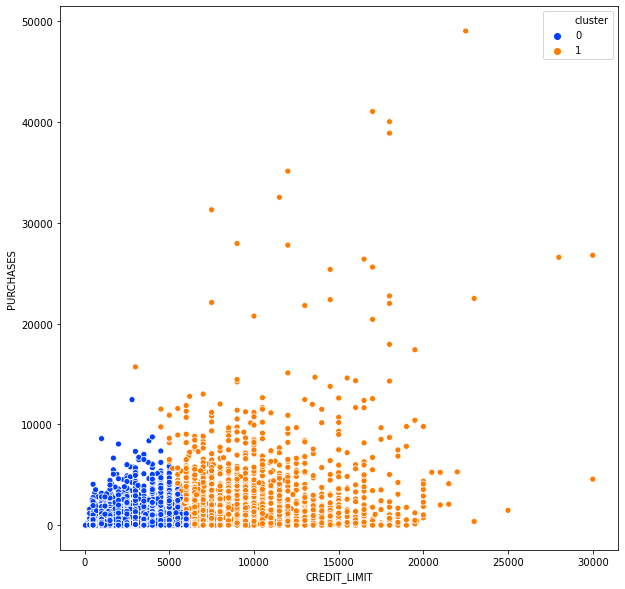

In [191]:
plt.figure(figsize=(10,10))
sns.scatterplot('CREDIT_LIMIT','PURCHASES', hue='cluster', data=x,palette='bright')

In [192]:
x.groupby('cluster').mean()[['CREDIT_LIMIT','PURCHASES']]

,CREDIT_LIMIT,PURCHASES
cluster,,
0,2690.896037,607.046995
1,9418.699079,2085.254456


In [ ]:
# bacaan untuk analisis cc general
# https://www.kaggle.com/sabanasimbutt/clustering-visualization-of-clusters-using-pca